# Laboratorium 2


### Konfiguracja

In [56]:
from typing import List, Any, Union, Tuple
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

import random

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [57]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


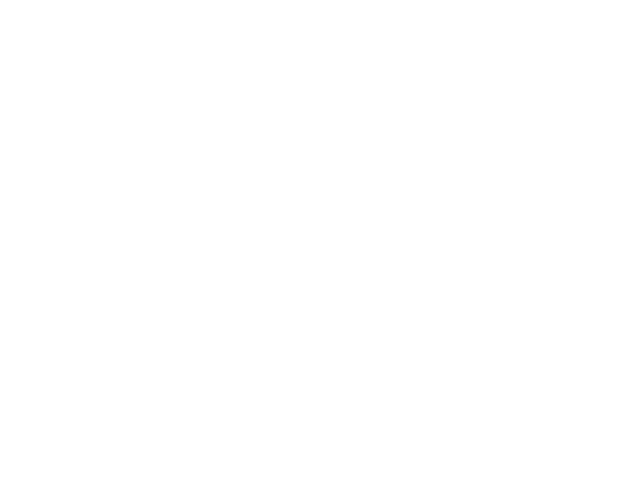

In [58]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Klasa Vector reprezentuje podstawowy typ na którym wykonujemy obliczenia

In [59]:
from random import choice
from random import random

import math

class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def len(self):
        return math.sqrt(math.pow(self.x, 2) + math.pow(self.y, 2))

    def to_unit_vector(self):
        length = self.len()
        
        return Vector(self.x / length, self.y / length)
    
    def to_point(self):
        return self.x, self.y
    
    def subtract(self, other):
        return Vector(self.x - other.x, self.y - other.y)
        
    def add(self, other):
        return Vector(self.x + other.x, self.y + other.y)
        
    def scale(self, to_length):
        a = to_length / self.len()
        
        return Vector(a * self.x, a * self.y)
    
    def dot_product(self, other):
        return self.x * other.x + self.y * other.y
    

## Funkcje generujące zbiory z punktu 3.

In [60]:
def generate_point_on_line(pt_a: Vector, pt_b: Vector):
    if pt_b.x - pt_a.x == 0:
        r = math.fabs(pt_b.y - pt_a.y)
        
        x = pt_a.x
        y = min(pt_a.y, pt_b.y) + random() * r
        
        return Vector(x, y).to_point()   
    
    a = (pt_b.y - pt_a.y) / (pt_b.x - pt_a.x)
    b = pt_a.y - a * pt_a.x
    
    r = math.fabs(pt_b.x - pt_a.x)
    
    x = min(pt_a.x, pt_b.x) + random() * r
    y = a * x + b
        
    return Vector(x, y).to_point()

def random_set_a(n, lower, upper):
    points = []
    r = upper - lower
    
    for i in range(n):
        x = random() * r + lower
        y = random() * r + lower
        point = (x, y)
        
        points.append(point)
        
    return points

def random_set_b(n, center: Vector, radius):
    points = []
    
    for i in range(n):
        t = random() * 2 * math.pi
        x = radius * math.cos(t) + center.x
        y = radius * math.sin(t) + center.y
        
        point = (x, y)
        points.append(point)
        
    return points

def random_set_c(n, a: Vector, b: Vector, c: Vector, d: Vector):
    points = []
    possibilities = [(a, b), (b, c), (c, d), (a, d)]
         
    for i in range(n):
        (start, end) = choice(possibilities)        
        
        point = generate_point_on_line(start, end)
        points.append(point)
    
    return points

### This function takes only one vertex to identify a square - it's done to make sure we have points on axes.
def random_set_d(n_desc_diagonal, n_asc_diagonal, n_axis_x, n_axis_y, upper_right: Vector):
    lower_left = Vector(0.0, 0.0)
    upper_left = Vector(lower_left.x, upper_right.y)
    lower_right = Vector(upper_right.x, lower_left.y)
    
    points = [ lower_left.to_point(), lower_right.to_point(),
               upper_left.to_point(), upper_right.to_point() ]
        
    for i in range(n_axis_x):
        (a, b) = (lower_left, lower_right)
        point = generate_point_on_line(a, b)
        
        points.append(point)
        
    for i in range(n_axis_y):
        (a, b) = (lower_left, upper_left)
        point = generate_point_on_line(a, b)
        
        points.append(point)
        
    for i in range(n_desc_diagonal):
        (a, b) = (upper_left, lower_right)
        point = generate_point_on_line(a, b)
        
        points.append(point)
    
    for i in range(n_asc_diagonal):
        (a, b) = (lower_left, upper_right)
        point = generate_point_on_line(a, b)
        
        points.append(point)
    
    return points


## Zbiory z punktu 1.

In [61]:
points_a = random_set_a(100, -100, 100)
points_b = random_set_b(100, Vector(0, 0), 10)
points_c = random_set_c(100, Vector(-10, 10), Vector(-10, -10), Vector(10, -10), Vector(10, 10))
points_d = random_set_d(20, 20, 25, 25, Vector(10.0, 10.0))

### Graficzna wizualizacja wyznaczonych zbiorów - punkt 2.

<IPython.core.display.Javascript object>


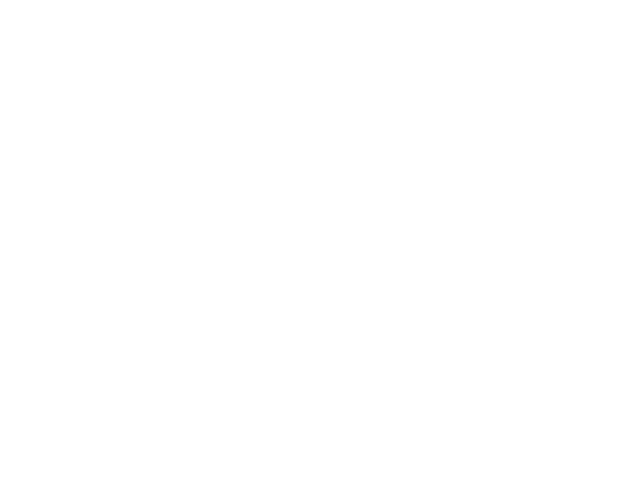

In [62]:
%matplotlib notebook

scenes = [
    Scene([PointsCollection(points_a)]),
    Scene([PointsCollection(points_b)]),
    Scene([PointsCollection(points_c)]),
    Scene([PointsCollection(points_d)]),
]

plot = Plot(scenes)
plot.draw()

## Implementacja algorytmów szukających otoczki wypukłej:
   - Algorytm Jarvisa
   - Algorytm Grahama


### Funkcje pomocniczne

In [63]:
import functools

def choose_lower_left(points):
    idx = 0
    p = points[idx]
    
    for (i, (x, y)) in enumerate(points):
        if (y < p[1]) or (y == p[1] and x < p[0]):   
            p = (x, y)
            idx = i
            
    return idx

def det(a, b, c):
    return a[0] * b[1] + a[1] * c[0] + b[0] * c[1] - b[1] * c[0] - a[0] * c[1] - a[1] * b[0]

def square_dist(a, b):
    return math.sqrt(math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))

def qsort(table, l, r, comparator):
    if l == r:
        return
    
    m = (l+r) // 2
    pivot = table[m]
    j = l
    table[r-1], table[m] = table[m], table[r-1]
    
    for i in range(l, r - 1):
        if comparator(table[i], pivot):
            table[i], table[j] = table[j], table[i]
            j += 1
    
    table[r-1], table[j] = table[j], table[r-1]
    
    qsort(table, l, j, comparator)
    qsort(table, j + 1, r, comparator)

def comparator(b, c, a, epsylon):
    d = det(a, b, c)
    diff = math.fabs(d - epsylon)
    
    if diff < epsylon:
        return square_dist(a, b) < square_dist(a, c)
    else:
        return d > epsylon

### Graham

In [64]:
import time

def graham(points, epsylon):
    start = time.time()
    p0 = points[choose_lower_left(points)]
    comp = functools.partial(comparator, a = p0, epsylon = epsylon)
    
    left = points[:]
    qsort(left, 0, len(left), comp)
    
    stack = left[0:3]

    for p in left[3:]:
        a = stack[-2]
        b = stack[-1]

        d = det(a, b, p)
        while d < -epsylon:
            stack.pop()
            a, b = stack[-2], stack[-1]

            d = det(a, b, p)

        if d > epsylon:
            stack.append(p)
        else:
            stack.pop()
            stack.append(p)

    end = time.time()
    total = end - start

    return stack, total

### Jarvis

In [65]:
def jarvis(points, epsylon):
    start = time.time()
    N = choose_lower_left(points)
    convex_hull = []
    
    p = N
    
    while True:
        convex_hull.append(points[p])
        q = (p + 1) % len(points)
                
        for i, pnt in enumerate(points):
            if i != p and i != q:
                d = det(points[p], points[q], pnt)
                
                if d < -epsylon:
                    q = i
                elif -epsylon <= d <= epsylon:
                    if square_dist(points[p], points[q]) < square_dist(points[p], pnt):
                        q = i
         
        p = q
        if p == N:
            break
            
    end = time.time()
    total = end - start
    
    return convex_hull, total

### Funkcje pomocnicze służące do wizualizacji:
- visualize: wyzancza otoczkę wpukłą używając najpierw Jarvisa następnie Grahama, wypisuje czasy działania.
- save: zapisuje wyznaczoną otoczkę 

In [66]:
%matplotlib notebook
import pickle

def connect_convex_hull(convex_hull):
    lines = []
    for k, end in enumerate(convex_hull):
        i = k - 1
        if k == 0:
            i = len(convex_hull) - 1
        
        start = convex_hull[i]
        lines.append([start, end])
        
    return lines

def create_scene(set, convex_hull):
    lines = connect_convex_hull(convex_hull)
    
    return Scene([
            PointsCollection(set, 'blue'),
            PointsCollection(convex_hull, 'red')
        ], [LinesCollection(lines, color="red")])
    
def visualize(set, epsylon):
    ch_jarvis, jarvis_time = jarvis(set, epsylon)
    ch_graham, graham_time = graham(set, epsylon)
    print("Jarvis: running time - {0}s \nGraham - running time - {1}s".format(jarvis_time, graham_time))
    
    jarvis_scene = create_scene(set, ch_jarvis)
    graham_scene = create_scene(set, ch_graham)
    scenes = [jarvis_scene, graham_scene]

    plot = Plot(scenes)
    plot.draw() 

def save(set, filename = "convex_hull"):
    with open(filename, 'wb') as handle:
        pickle.dump(set, handle, protocol = pickle.HIGHEST_PROTOCOL)

epsylon = 10**(-3)

### Testowanie wyników działania algorytmów 

In [ ]:
set = points_a
visualize(set, epsylon)

In [ ]:
set = points_b
visualize(set, epsylon)

Jarvis: running time - 0.0009975433349609375s 
Graham - running time - 0.0009961128234863281s


<IPython.core.display.Javascript object>


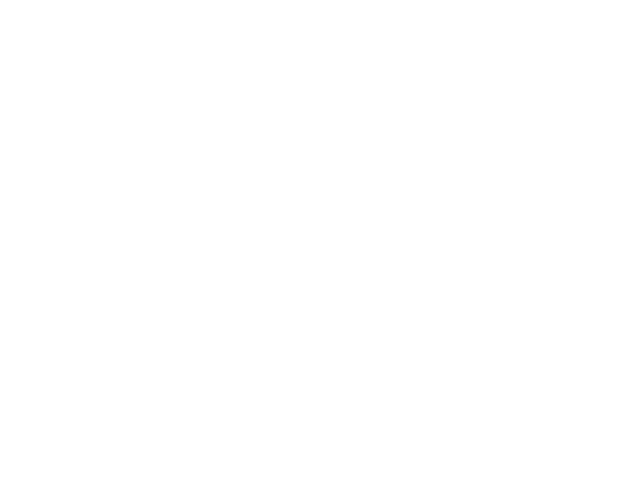

In [69]:
set = points_c
visualize(set, epsylon)

Jarvis: running time - 0.0009975433349609375s 
Graham - running time - 0.0009965896606445312s


<IPython.core.display.Javascript object>


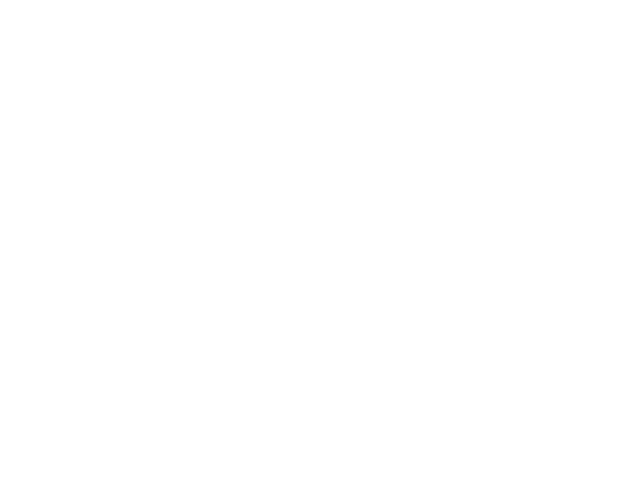

In [70]:
set = points_d
visualize(set, epsylon)

### Dodatkowe zbiory

Jarvis: running time - 2.440127372741699s 
Graham - running time - 3.177715301513672s


<IPython.core.display.Javascript object>


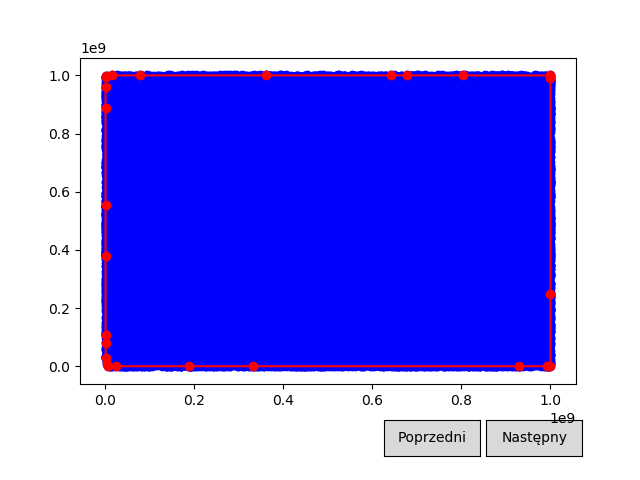

In [80]:
set = random_set_a(10 ** 5, 0.0, 10**9)
visualize(set, epsylon)

In [77]:
set = random_set_d(50, 50, 50, 50, Vector(100.0, 100.0))
visualize(set, epsylon)

IndexError: list index out of range

In [ ]:
set = random_set_b(10 ** 3, Vector(0.0, 0.0), 1000)
visualize(set, epsylon)